# Hands-on clustering #2:

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [15, 15]


# 1 Data

# 2 Data exploration

## 2.1 Read the *u.data* file using the `read csv` method of the pandas library. The columns are separated by tabs (“\t”). We will only use the first three columns, which correspond respectively to “User ID”, “Movie ID” and “Rating”.

In [2]:
movie_lens = pd.read_csv("./ml-100k/u.data", sep="\t",
                         usecols=[0, 1, 2], 
                         names=["User_ID", "Movie_ID", "Rating"])


In [3]:
movie_lens

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [4]:
movie_lens.shape


(100000, 3)

## 2.2 In order to get a better understanding of the data:

- Display the first few columns (df.head()),
- Verify the number of different users and the number of different movies
- Display the summary of the ratings, using the describe method.

In [5]:
movie_lens.head()

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [6]:
movie_lens.describe()

,User_ID,Movie_ID,Rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [7]:
nUsers = movie_lens['User_ID'].nunique()
print(f"Nombre d'User ID ≠: {nUsers}")
nMovies = movie_lens['Movie_ID'].nunique()
print(f"Nombre de Movie ID ≠: {nMovies}")
nRatings = movie_lens['Rating'].nunique()
print(f"Nombre de Rating ≠: {nRatings}")


Nombre d'User ID ≠: 943
Nombre de Movie ID ≠: 1682
Nombre de Rating ≠: 5


## 2.3 Visualize the histogram of the ratings. Should we normalize these values before applying NMF?

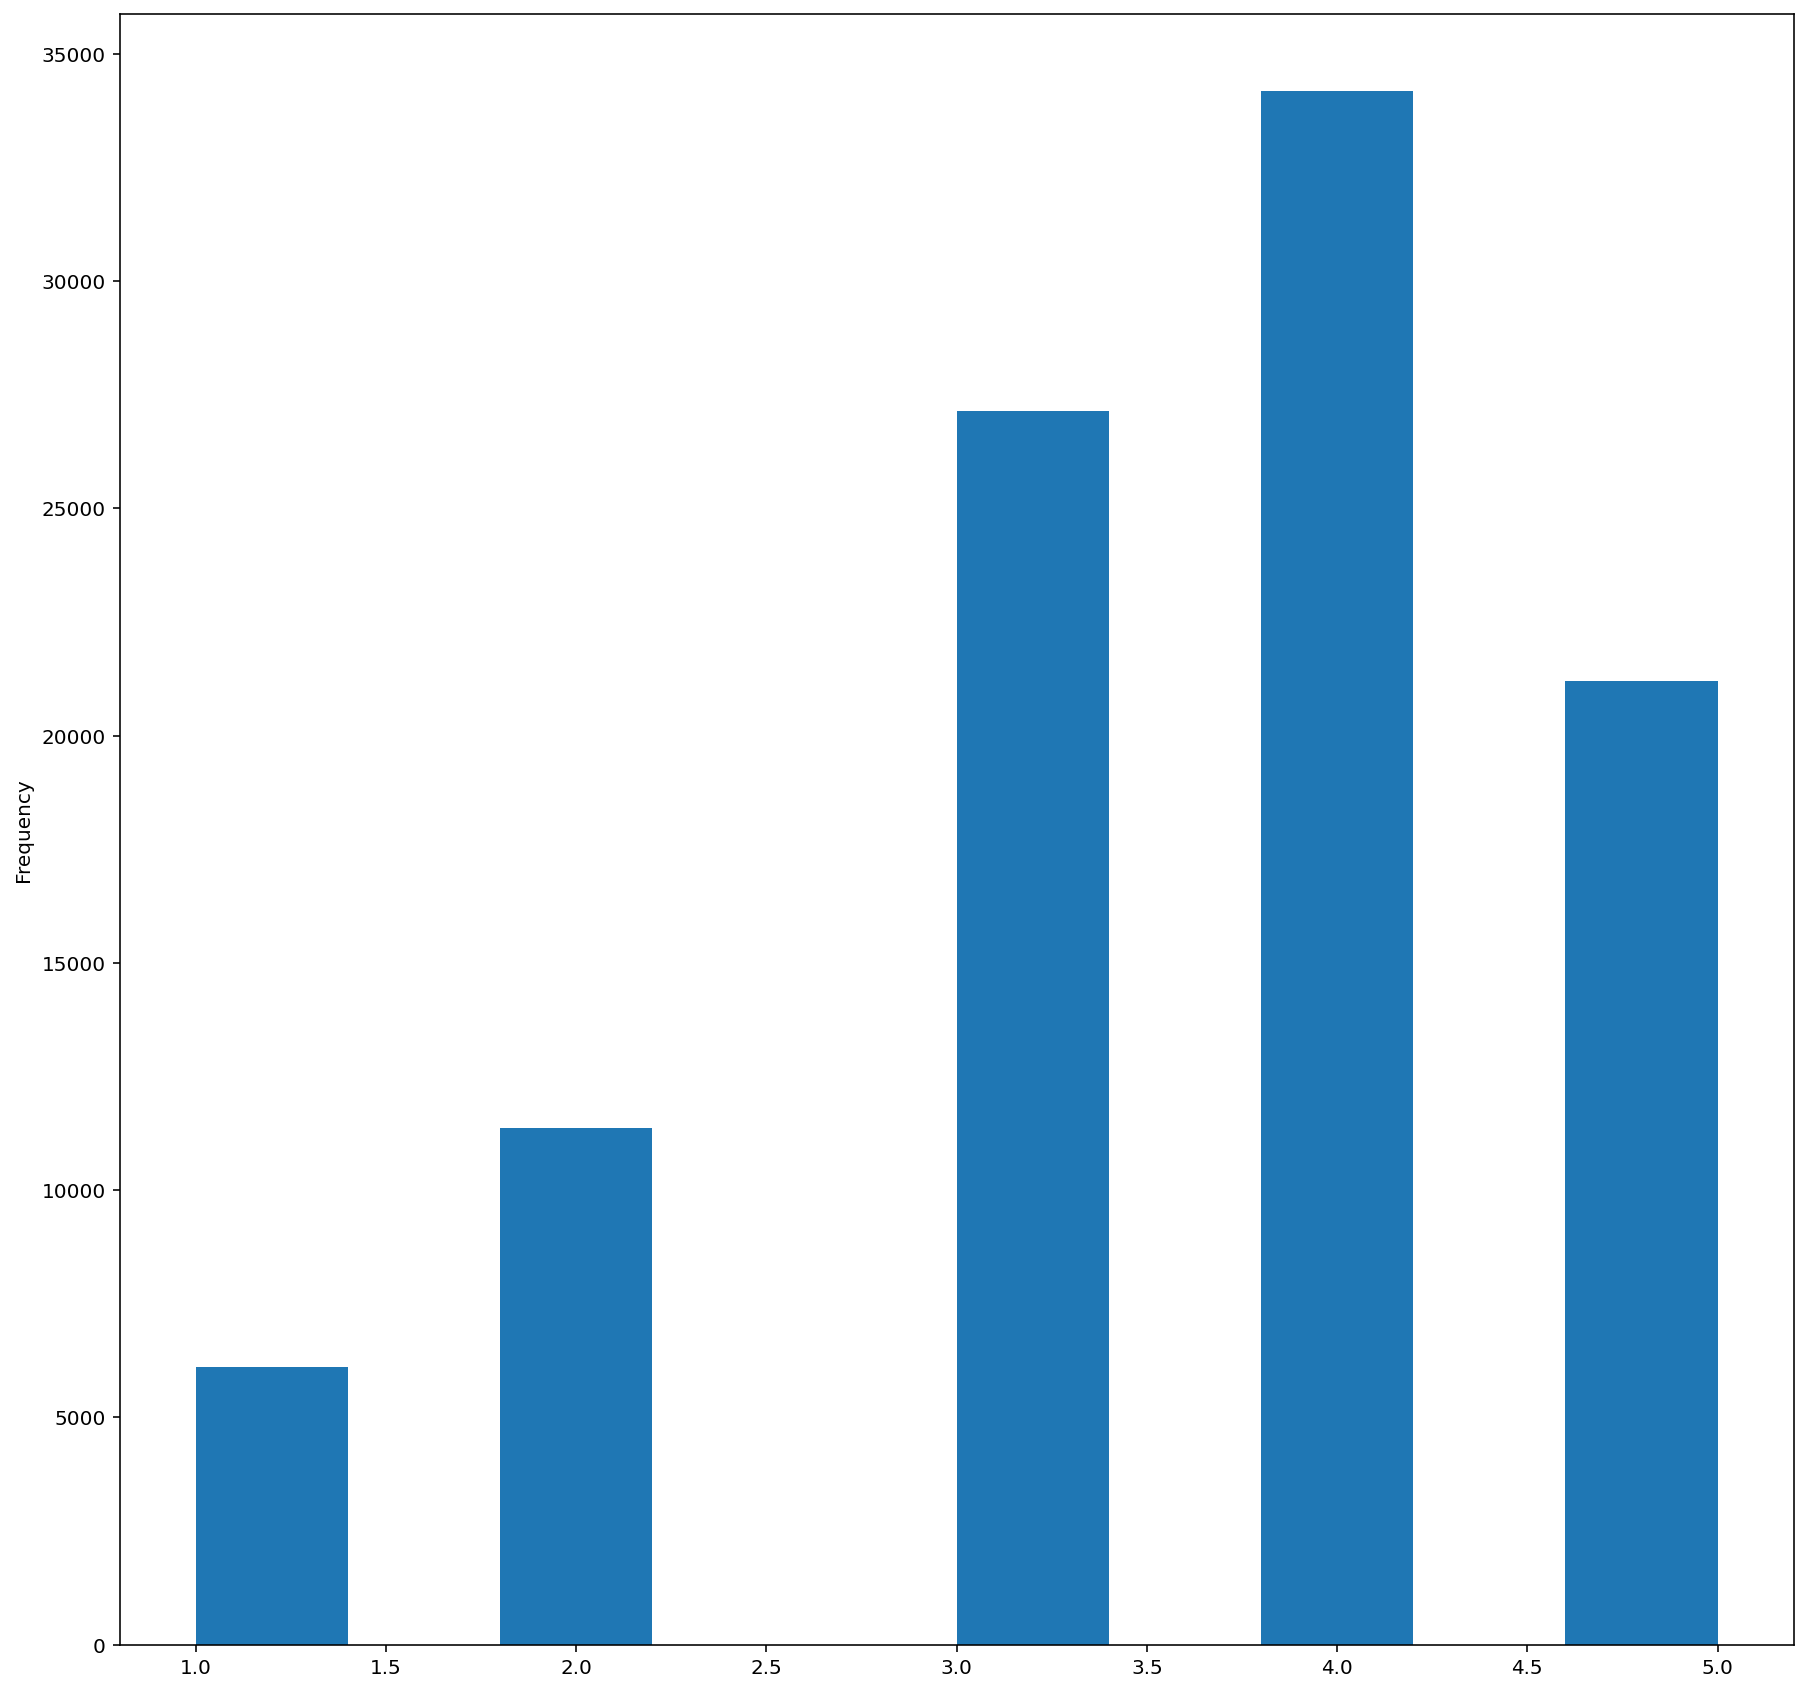

In [8]:
movie_lens["Rating"].plot.hist()
plt.show()

No, we sould not normalize the dataset ! As it's a discrete space. And as we want to use NMF we need to have a non-zero matrix

## 2.4 Plot the histogram representing the number of ratings per user. How many movies did people rate on average? Other statistics (min, max, median, quartiles)?

In [9]:
users_num_rating = movie_lens.groupby("User_ID")

In [10]:
movie_lens.loc[movie_lens["User_ID"] == 1]

,User_ID,Movie_ID,Rating
202,1,61,4
305,1,189,3
333,1,33,4
334,1,160,4
478,1,20,4
...,...,...,...
92049,1,28,4
92487,1,172,5
94019,1,122,3
96699,1,152,5


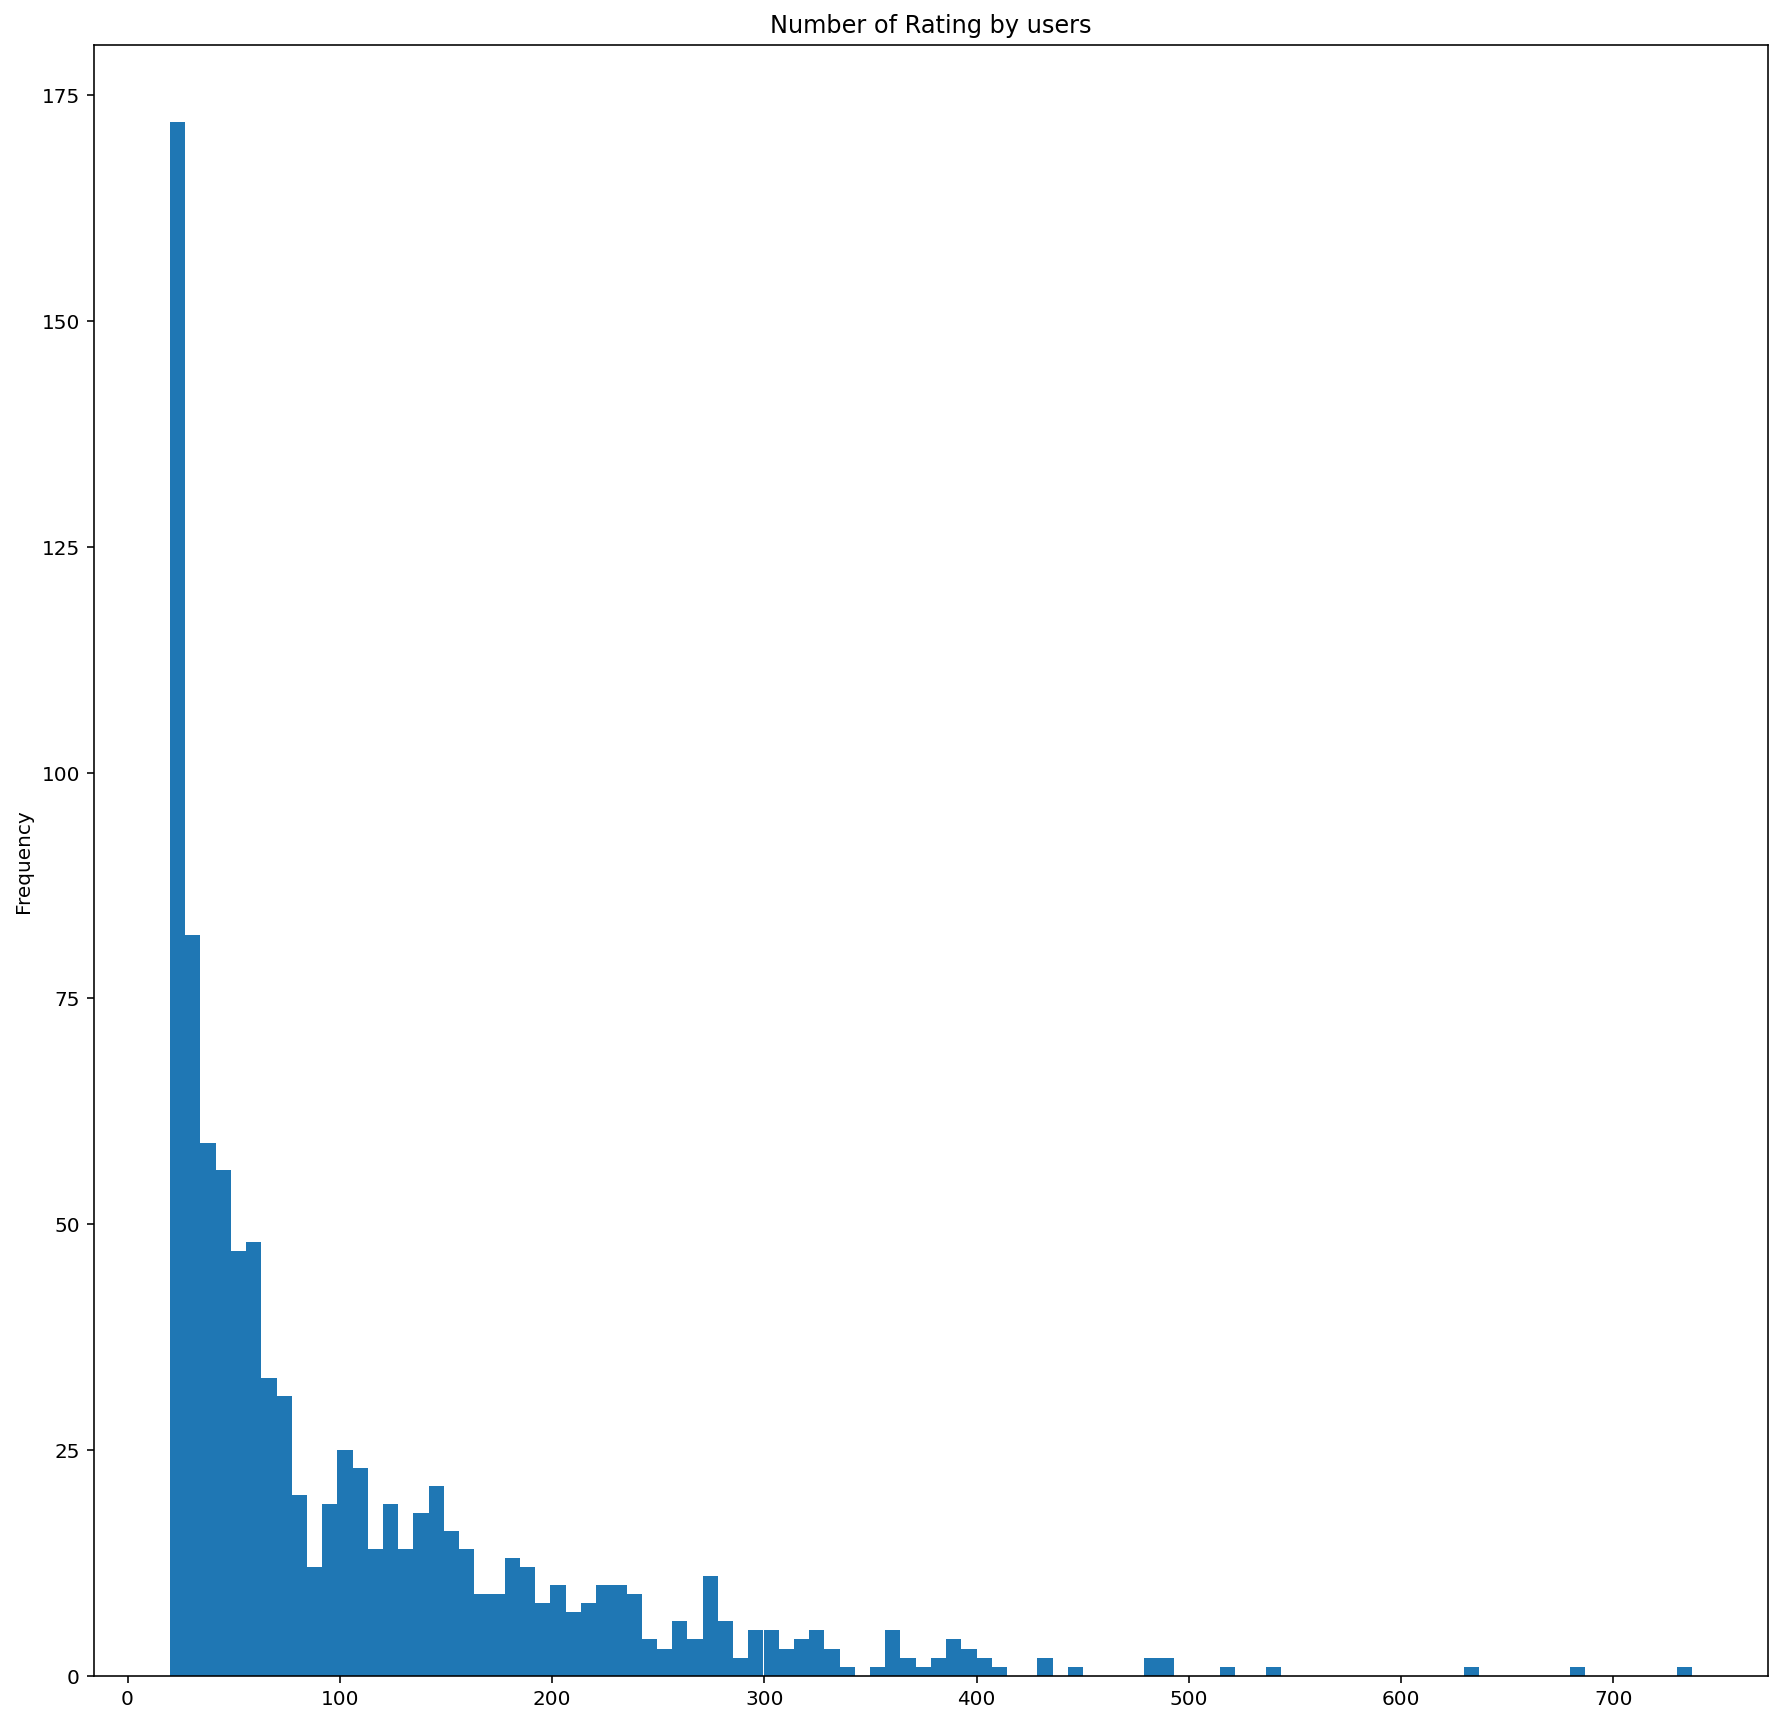

In [11]:
users_num_rating.count().Rating.plot.hist(bins = 100)
plt.title("Number of Rating by users")
plt.show()


In [12]:
print(f"En moyenne chaque utilisateur note : {users_num_rating.count().Rating.mean()} films")

En moyenne chaque utilisateur note : 106.04453870625663 films


In [13]:
users_num_rating.count().Rating.describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: Rating, dtype: float64

## 2.5 Plot the histogram representing the average rating per movie. Comment on the spikes positions. Find a movie that received only ratings of 1? of 5? (The movie titles can be read from the “u.item” file, using the following line of code: movie titles = pd.read csv(”Data/ml-100k/u.item”, sep=”|”, header=None, usecols=[1], encoding=’iso-8859-1’, names=[”Title”]))

In [14]:
movie_titles = pd.read_csv("./ml-100k/u.item", sep="|", header=None,
                           usecols=[1], encoding="iso-8859-1", names=["Title"])

In [15]:
movie_titles = movie_titles.to_numpy()


In [16]:
users_num_rating = movie_lens.groupby("Movie_ID")


In [17]:
users_num_rating.mean().Rating


Movie_ID
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: Rating, Length: 1682, dtype: float64

[]

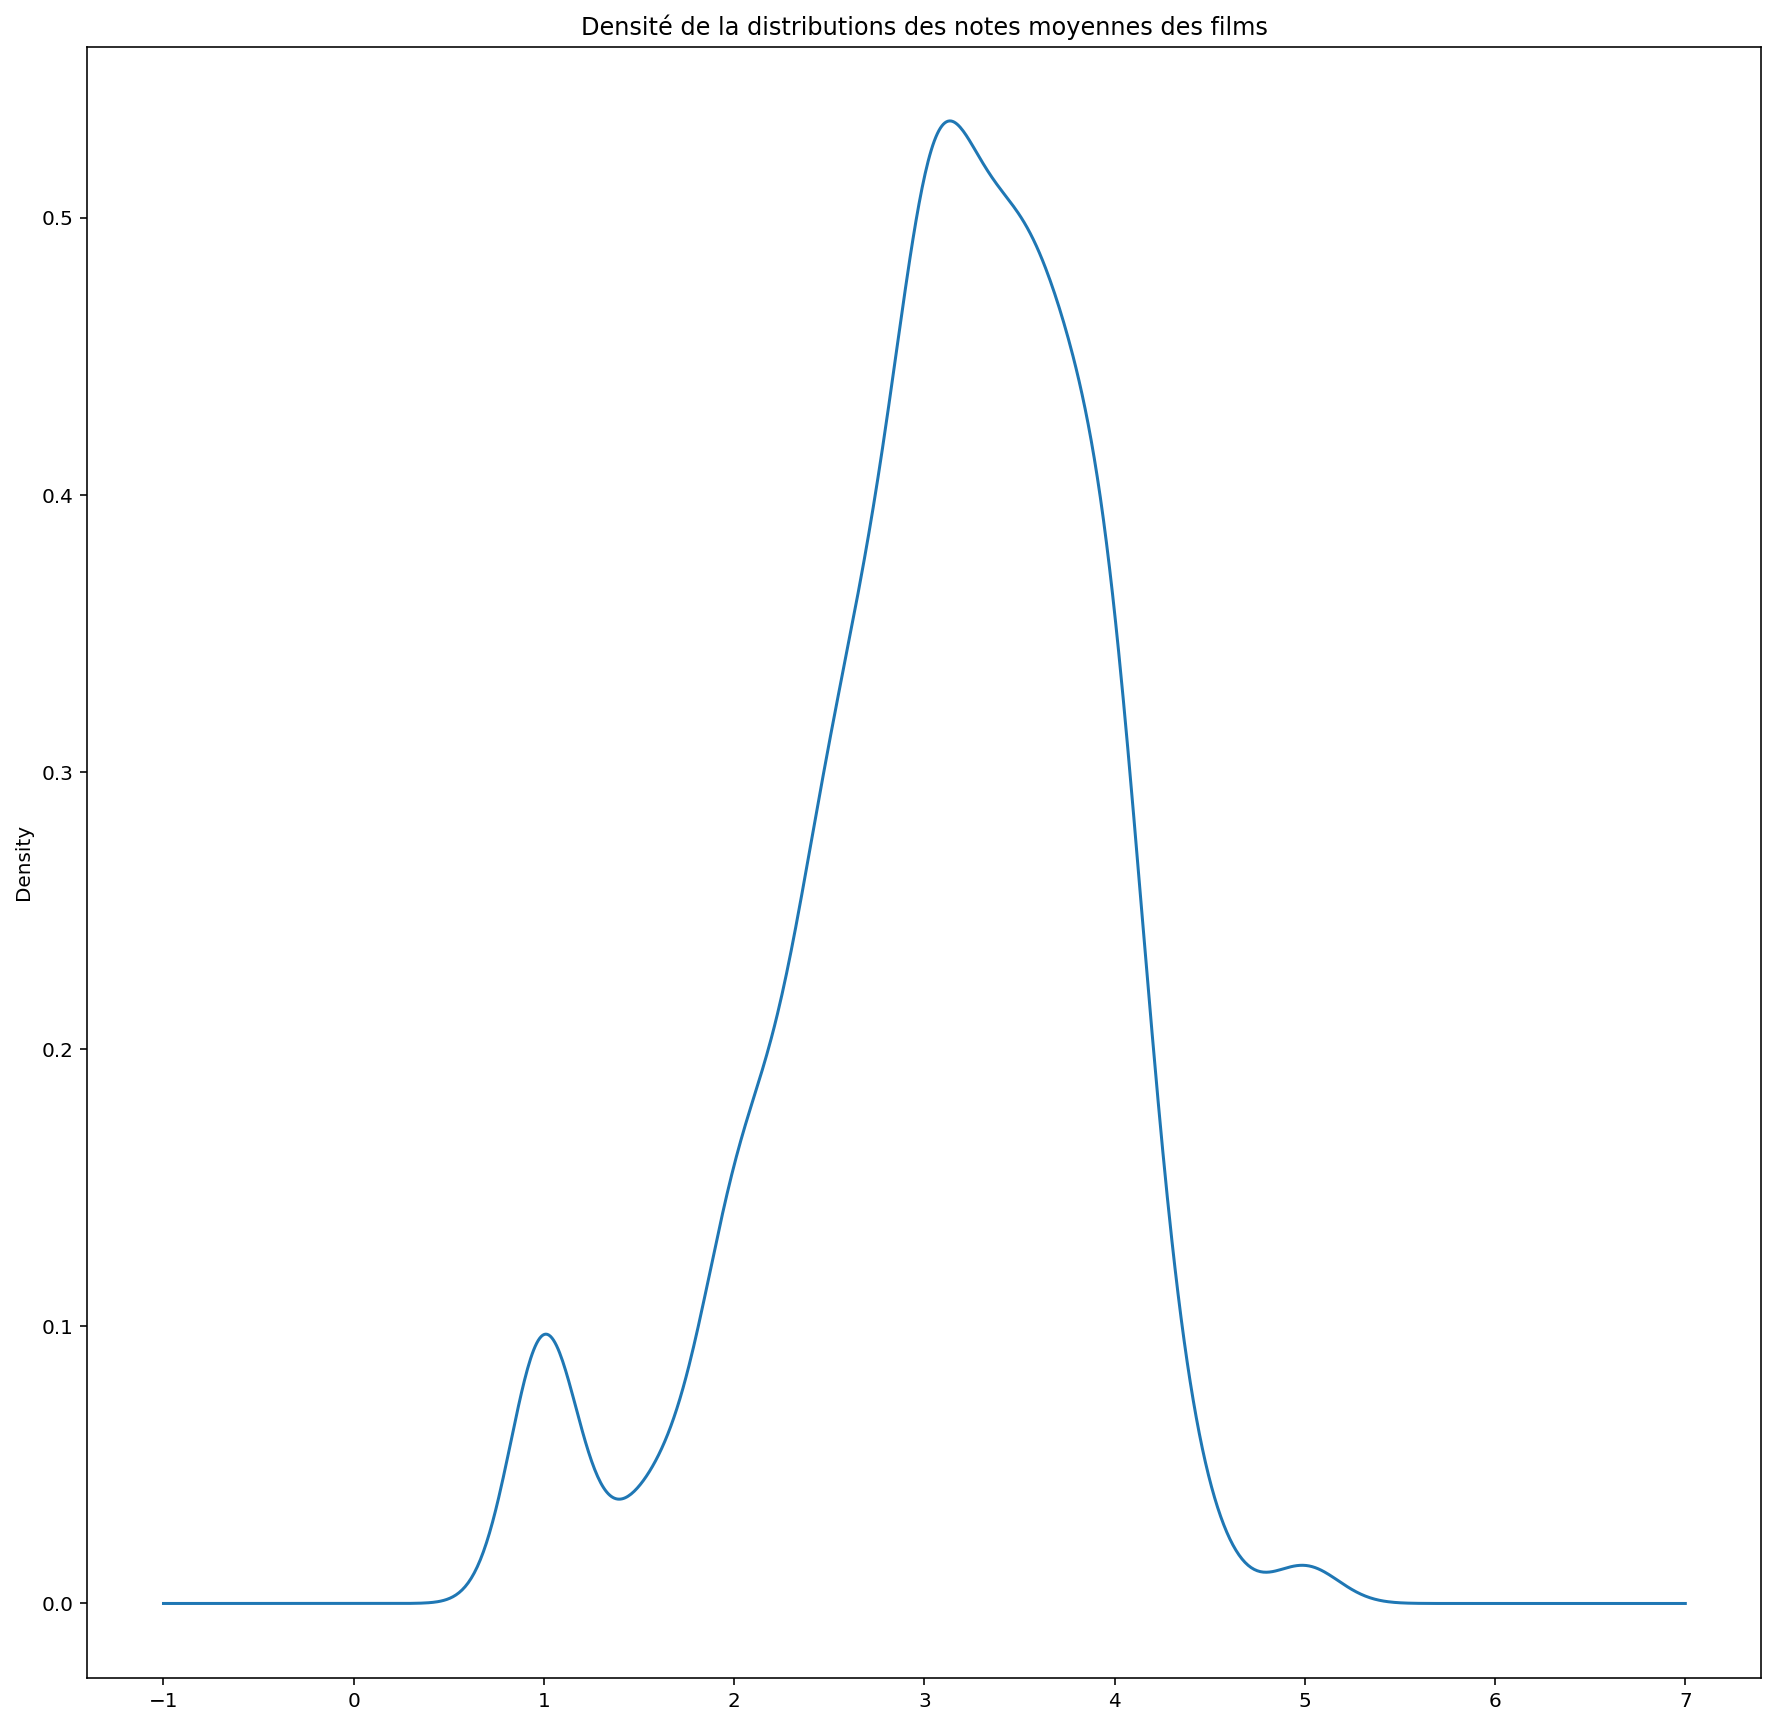

In [18]:
users_num_rating.mean().Rating.plot.density()
plt.title("Densité de la distributions des notes moyennes des films")
plt.plot()

La position maximal de la densité est logiquement la note la plus données c'est a dire 3.

In [19]:
for movie_id in range(1, nMovies+1):
    if (movie_lens.loc[movie_lens["Movie_ID"] == movie_id].Rating == 5).all():
        print(f"Le film numéro: {movie_id} n'as que des notes de 5")
    elif (movie_lens.loc[movie_lens["Movie_ID"] == movie_id].Rating == 1).all():
        print(f"Le film numéro: {movie_id} n'as que des notes de 1")


Le film numéro: 314 n'as que des notes de 1
Le film numéro: 437 n'as que des notes de 1
Le film numéro: 439 n'as que des notes de 1
Le film numéro: 599 n'as que des notes de 1
Le film numéro: 784 n'as que des notes de 1
Le film numéro: 814 n'as que des notes de 5
Le film numéro: 830 n'as que des notes de 1
Le film numéro: 852 n'as que des notes de 1
Le film numéro: 858 n'as que des notes de 1
Le film numéro: 1122 n'as que des notes de 5
Le film numéro: 1189 n'as que des notes de 5
Le film numéro: 1201 n'as que des notes de 5
Le film numéro: 1293 n'as que des notes de 5
Le film numéro: 1308 n'as que des notes de 1
Le film numéro: 1309 n'as que des notes de 1
Le film numéro: 1320 n'as que des notes de 1
Le film numéro: 1325 n'as que des notes de 1
Le film numéro: 1329 n'as que des notes de 1
Le film numéro: 1334 n'as que des notes de 1
Le film numéro: 1339 n'as que des notes de 1
Le film numéro: 1340 n'as que des notes de 1
Le film numéro: 1341 n'as que des notes de 1
Le film numéro: 134

# 3 Applying NMF

## 3.1 Most recommendation models consist in building a user-by-item matrix with some sort of ”interaction” number in each cell. Here, users give items numerical ratings, this is called an explicit feedback model. Build the user-item matrix for the movie rating problem studied here.

In [20]:
ratings = []
users_indice = []
movies_indice = []
for (i, j), ratings_for_users_movies in movie_lens.groupby(["User_ID", "Movie_ID"]):
    ratings.append(ratings_for_users_movies.Rating.mean())
    users_indice.append(i-1)
    movies_indice.append(j-1)

In [21]:
user_by_item = scipy.sparse.csr_matrix(
    (ratings, (users_indice, movies_indice)), shape=(nUsers, nMovies))


In [22]:
user_by_item.todense()


matrix([[5., 3., 4., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [5., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 5., 0., ..., 0., 0., 0.]])

## 3.2 What is the sparsity of the matrix obtained? (proportion of zeros)

In [23]:
sparsity = 1- user_by_item.count_nonzero()/np.product(user_by_item.shape)

In [24]:
sparsity


0.9369533063577546

## 3.3 Apply NMF on this matrix with 20 components.

In [91]:
from sklearn.decomposition import NMF

X = user_by_item
nmf = NMF(n_components=20, init="random", max_iter=600)
nmf.fit(X)
W = nmf.transform(X)
H = nmf.components_

# print("Original data")
# print(X)
# print("\nReconstructed data")
# print(W.dot(H))


In [26]:
print(f"Shape of the features matrix for movies: {H.shape}, on a bien {nMovies}")
print(f"Shape of the features matrix for users: {W.shape}, on a bien {nUsers}")


Shape of the features matrix for movies: (20, 1682), on a bien 1682
Shape of the features matrix for users: (943, 20), on a bien 943


## 3.4 Build the reconstructed user-item matrix. What is the average reconstruction error on the true ratings (only the ones present in the original dataset)?

In [27]:
reconstruct_X = W.dot(H)

In [109]:
nonZeroidxs = X.nonzero()
nonZeroidx_i = nonZeroidxs[0]
nonZeroidx_j = nonZeroidxs[1]

In [163]:
print("\nSquared reconstruction error")
np.mean([(reconstruct_X[i, j] - X[i, j])**2 for (i, j) in zip(nonZeroidx_i, nonZeroidx_j)])



Squared reconstruction error


4.994187277679005

In [164]:
correction_function = lambda x: max(1.0, min(5.0, x))

In [165]:
reconstruct_X_corrected = np.vectorize(correction_function)(reconstruct_X)


In [215]:
reconstruct_X_corrected[0, 2]

1.1478638054273778

In [212]:
X[0, 2]

4.0

# 4 Make recommendations

## 4.1 Known user

### 4.1.1 Select a user at random within the dataset and recommend five movies he has not seen. The recom- mended movies are the ones with highest reconstruction scores among the unseen movies.


In [259]:
selected_user = np.random.randint(1, nUsers+1)
selected_user = 139


In [260]:
best_movies = np.argsort(reconstruct_X_corrected[selected_user])[::-1]

In [264]:
top5_movies = best_movies[:4]


In [265]:
top5_movies = movie_titles[top5_movies]


In [266]:
top5_movies


array([['Full Monty, The (1997)'],
       ['English Patient, The (1996)'],
       ['L.A. Confidential (1997)'],
       ['Chasing Amy (1997)']], dtype=object)

In [249]:
user_favourite = np.argsort(X[selected_user, :].todense())[::-1]
user_favourite = np.array(user_favourite)[0]
top5_favourite = movie_titles[user_favourite[:4]]


In [250]:
top5_favourite


array([['Glimmer Man, The (1996)'],
       ["Jupiter's Wife (1994)"],
       ['Chungking Express (1994)'],
       ['Heidi Fleiss: Hollywood Madam (1995) ']], dtype=object)

### 4.1.2 Compare the recommendations with the user’s favorite movies. Comment.

### 4.1.3 Find the three “topics” used by the NMF algorithm to choose the recommendations. Display the top movies representing these topics.

In [242]:
def plot_topics(H, feature_names):
    n_top_movies = 10
    fig, axes = plt.subplots(4, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for i in range(H.shape[0]):
        topic = H[i, :]
        top_features = topic.argsort()[: -n_top_movies - 1: -1]
        top_features_names = [feature_names[j][0][:min(
            7, len(feature_names[j][0]))] for j in top_features]
        top_features_scores = [topic[j] for j in top_features]
        
        ax = axes[i]
        ax.barh(top_features_names, top_features_scores, height=0.7)
        ax.set_title(f"Topic {i+1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


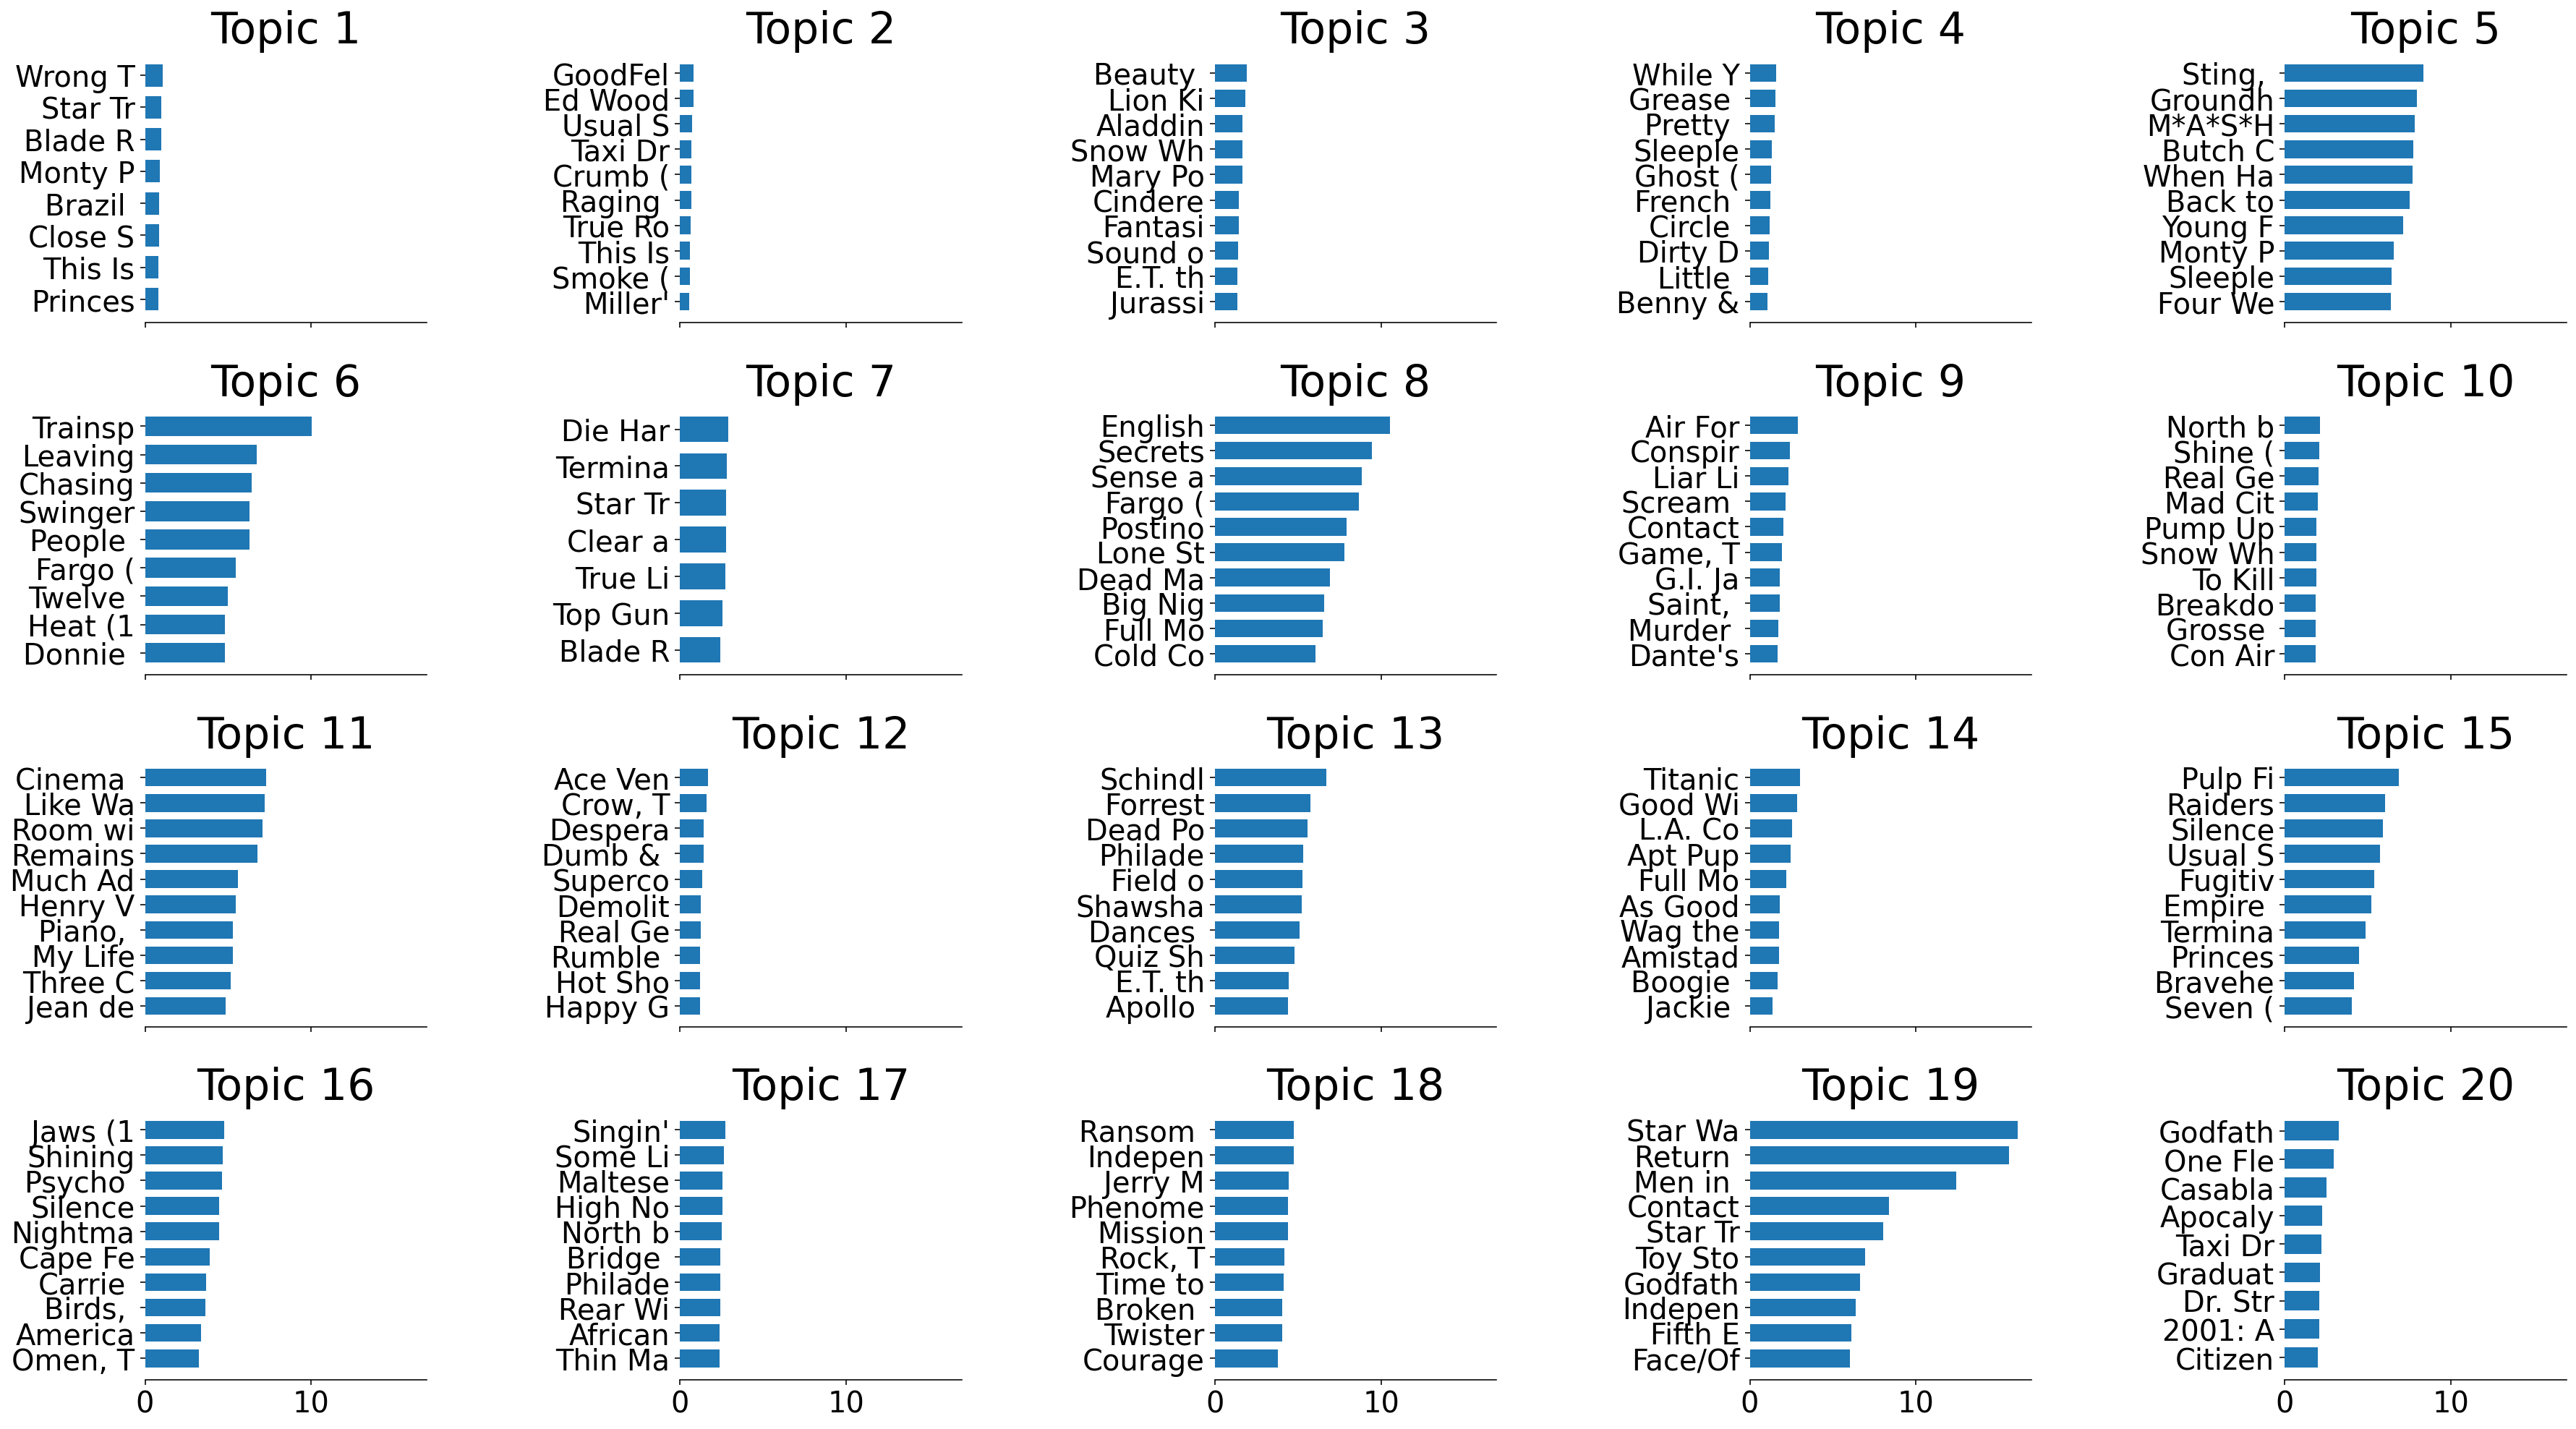

In [243]:
plot_topics(H, movie_titles)


# 4.2 New user with rating history

### 4.2.1 Create a new user (the new user.txt file on Moodle works well) and update the user-item matrix.

In [268]:
my_ratings = np.zeros((1682, 1), dtype=int)
my_ratings[0] = 4
my_ratings[1] = 4
my_ratings[10] = 1
my_ratings[15] = 3
my_ratings[27] = 4
my_ratings[34] = 1
my_ratings[49] = 1
my_ratings[55] = 1
my_ratings[61] = 1
my_ratings[68] = 5
my_ratings[70] = 4
my_ratings[81] = 4
my_ratings[87] = 2
my_ratings[94] = 4
my_ratings[120] = 2
my_ratings[171] = 1
my_ratings[173] = 4
my_ratings[175] = 1
my_ratings[182] = 1
my_ratings[194] = 2
my_ratings[203] = 5
my_ratings[209] = 5
my_ratings[221] = 1
my_ratings[234] = 2
my_ratings[312] = 3
my_ratings[317] = 3
my_ratings[322] = 3
my_ratings[342] = 1
my_ratings[378] = 1
my_ratings[379] = 1
my_ratings[392] = 3
my_ratings[404] = 2
my_ratings[422] = 4
my_ratings[542] = 4

### 4.2.2 Retrain the NMF model with the new matrix, and make a recommendatino for this new user.